<a href="https://colab.research.google.com/github/KarinkinK/personal_repo/blob/master/Coursework_analytics_2_KKh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [ ]:
import psycopg2

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

**Примеры гипотез:**

**1. Есть ли менеджеры, у которых сотрудники работают лучше всего? Т.е. рабочие соответствуют необходимой производительности и меньше увольняются в последствии.**

**2. Чем более оплачиваемая должность, тем дольше сотрудник работает в компании и тем он старше.**

**3. Чем бльше затраты на ресурс по найму, тем больше оттуда наняли сотрудников.**

In [ ]:
import pandas as pd

Названия колонок в талице hr_dataset.

id - id работника
Employee Name - Имя работника
marriedid - статус замужества (1 - замужем/женат, 0 - не замужем/не женат)
maritalstatusid - семейное положение
genderid - пол
empstatus_id - ?
deptid - id отдела
perf_scoreid - id показателя производительности
age - возраст
Date of Hire - дата найма
Days Employed - кол-во отработанных дней
Date of Termination - дата увольнения
Reason For Term - причина увольнения
Employment Status - рабочий статус
department - отдел
position - должность/позиция
Manager Name - имя менеджера
Employee Source - откуда нанят сотрудник
Performance Score - показатель производительности

In [ ]:
hr_df = pd.read_sql_query("SELECT * FROM hr_dataset;", conn)
hr_df.head(10)

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
5,6,"Smith, Leigh Ann",711007713,1,1,0,5,1,3,30,...,2011-09-26,730,2013-09-25,career change,Voluntarily Terminated,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
6,7,"LeBlanc, Brandon R",1102024115,1,1,1,1,1,3,33,...,2016-01-05,691,None,N/A - still employed,Active,Admin Offices,Shared Services Manager,Janet King,Monster.com,Fully Meets
7,8,"Quinn, Sean",1206043417,1,1,1,5,1,3,33,...,2011-02-21,1636,2015-08-15,career change,Voluntarily Terminated,Admin Offices,Shared Services Manager,Janet King,Diversity Job Fair,Fully Meets
8,9,"Boutwell, Bonalyn",1307060188,1,1,0,1,1,0,31,...,2015-02-16,1014,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Brandon R. LeBlanc,Diversity Job Fair,90-day meets
9,10,"Foster-Baker, Amy",1201031308,1,1,0,1,1,3,39,...,2009-01-05,3247,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Board of Directors,Other,Fully Meets


Названия колонок в талице production_staff.

id - id работника
Employee Name - Имя работника
Race Desc - расовая принадлежность
Date of Hire - дата найма
TermDate - дата увольнения
Reason for Term - причина увольнения
Employment Status - рабочий статус
Department - отдел
Position - должность
Pay - оплата
Manager Name - имя менеджера
Performance Score - показатель производительности
Abutments/Hour Wk 1 - ?
Abutments/Hour Wk 2 - ?
Daily Error Rate - ежедневный рейтинг ошибок
90-day Complaints - жалобы за 3 месяца

In [ ]:
prod_staf = pd.read_sql_query("SELECT * FROM production_staff;", conn)
prod_staf.head(10)
#prod_staf.info()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
5,6,"Hogland, Jonathan",White,2011-01-10,2015-12-12,attendance,Terminated for Cause,Production,Production Manager,$48.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
6,7,"Immediato, Walter",Asian,2011-02-21,2012-09-24,unhappy,Voluntarily Terminated,Production,Production Manager,$42.00,Elisa Bramante,Needs Improvement,0.0,0.0,0.0,0.0
7,8,"Liebig, Ketsia",White,2013-09-30,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
8,9,"Miller, Brannon",Hispanic,2012-08-16,None,N/A - still employed,Active,Production,Production Manager,$53.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
9,10,"Peterson, Ebonee",White,2010-10-25,2016-05-18,Another position,Voluntarily Terminated,Production,Production Manager,$38.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [ ]:
salary_df = pd.read_sql_query("SELECT * FROM salary_grid;", conn)
salary_df

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


In [ ]:
recruiting_costs_df = pd.read_sql_query("SELECT * FROM recruiting_costs;", conn)
recruiting_costs_df

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [ ]:
#Проанализируем таблицу hr_dataset.

#Посмотрим, сколько сотрудников состоят в браке, а сколько нет.
sql_str = """SELECT COUNT(*) AS married, AVG("Days Employed") FROM hr_dataset 
WHERE marriedid = 1 UNION 
SELECT COUNT(*) AS not_married, AVG("Days Employed") FROM hr_dataset WHERE marriedid = 0;"""

cursor.execute(sql_str)
count_married = [a for a in cursor.fetchall()]
#conn.commit()

print('Кол-во работников в браке:', count_married[0][0],'Средняя выработка в днях:', round(count_married[0][1], 2), 
      '\nНе состоящих в браке:', count_married[1][0],'Средняя выработка в днях:', round(count_married[1][1], 2))


Кол-во работников в браке: 123 Средняя выработка в днях: 1246.24 
Не состоящих в браке: 187 Средняя выработка в днях: 1328.87


In [ ]:
#Подсчитаем средний возраст сотрудника по полу, и средний возраст в каждом отделе.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = "SELECT COUNT(genderid), AVG(age) AS avg_age FROM hr_dataset GROUP BY genderid;"

cursor.execute(sql_str)
gender_avg_age = [a for a in cursor.fetchall()]

print('Кол-во женщин(genderid - 0):', gender_avg_age[0][0], 'Средний возраст:', round(gender_avg_age[0][1], 2),
      '\nКол-во женщин(genderid - 1):', gender_avg_age[1][0], 'Средний возраст:', round(gender_avg_age[1][1], 2))

Кол-во женщин(genderid - 0): 177 Средний возраст: 38.96 
Кол-во женщин(genderid - 1): 133 Средний возраст: 38.74


In [ ]:
sql_str = "SELECT department, AVG(age) AS avg_age FROM hr_dataset GROUP BY department;"

cursor.execute(sql_str)
department_avg_age = [a for a in cursor.fetchall()]

print('Средний возраст сотрудников в каждом подразделении.')
for i in range(len(department_avg_age)):
    print('Отдел ', department_avg_age[i][0], ':', round(department_avg_age[i][1], 2))


Средний возраст сотрудников в каждом подразделении.
Отдел  Production        : 39.38
Отдел  Admin Offices : 32.30
Отдел  IT/IS : 38.02
Отдел  Executive Office : 63.00
Отдел  Software Engineering : 35.90
Отдел  Sales : 39.10


Cамые молодые сотрудники работают в административном отделе, а самые возрастные в руководстве.

In [ ]:
#Посмотрим информацию в каком подразделении сотрудники работают дольше всего
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT department, AVG("Days Employed") AS avg_days 
FROM hr_dataset GROUP BY department ORDER BY avg_days DESC;"""

cursor.execute(sql_str)
department_avg_days = [a for a in cursor.fetchall()]

print('Средняя продолжительность работы сотрудников в каждом подразделении.')
for i in range(len(department_avg_days)):
    print('Отдел ', department_avg_days[i][0], ':', round(department_avg_days[i][1], 2))


Средняя продолжительность работы сотрудников в каждом подразделении.
Отдел  Executive Office : 1973.00
Отдел  Sales : 1621.55
Отдел  Admin Offices : 1420.70
Отдел  Software Engineering : 1417.80
Отдел  Production        : 1308.02
Отдел  IT/IS : 981.80


Дольше всего в среднем в компании работают сотрудники в отделе упраления, меньше всего в IT.

In [ ]:
#Оценим количество уволенных сотрудников в рамках каждой должности и по отделам.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT position, COUNT("Date of Termination") 
FROM hr_dataset WHERE "Date of Termination" IS NOT NULL GROUP BY position;"""

cursor.execute(sql_str)
count_term_pos = [a for a in cursor.fetchall()]

print('Количество уволенных сотрудников по каждой должности.')
for i in range(len(count_term_pos)):
    print('Должность ', count_term_pos[i][0], ':', count_term_pos[i][1])


sql_str1 = """SELECT Department, COUNT("Date of Termination") 
FROM hr_dataset WHERE "Date of Termination" IS NOT NULL GROUP BY Department;"""

cursor.execute(sql_str1)
count_term_dept = [a for a in cursor.fetchall()]

print('\nКоличество уволенных сотрудников по отделам.')
for i in range(len(count_term_dept)):
    print('Отдел ', count_term_dept[i][0], ':', count_term_dept[i][1])
    

Количество уволенных сотрудников по каждой должности.
Должность  Production Manager : 5
Должность  Shared Services Manager : 1
Должность  Production Technician I : 52
Должность  Sales Manager : 1
Должность  Software Engineer : 3
Должность  Production Technician II : 26
Должность  Sr. DBA : 3
Должность  Network Engineer : 1
Должность  Area Sales Manager : 3
Должность  Administrative Assistant : 2
Должность  IT Manager - DB : 1
Должность  Database Administrator : 5

Количество уволенных сотрудников по отделам.
Отдел  Admin Offices : 3
Отдел  IT/IS : 10
Отдел  Software Engineering : 3
Отдел  Sales : 4
Отдел  Production        : 83


Больше всего уволено было техников из отдела продакшена.

In [ ]:
#Посмотрим на наиболее частую причину вольнения сотрудников.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT "Reason For Term", COUNT("Reason For Term") AS count_term 
FROM hr_dataset GROUP BY "Reason For Term" ORDER BY count_term DESC;"""

cursor.execute(sql_str)
reason_term = [a for a in cursor.fetchall()]

print('Наиболее частые причины увольнения сотрудников.')
for i in range(len(reason_term)):
    print('\nПричина увольнения:', reason_term[i][0], '\nКоличество сотрудников:', reason_term[i][1])


Наиболее частые причины увольнения сотрудников.

Причина увольнения: N/A - still employed 
Количество сотрудников: 197

Причина увольнения: Another position 
Количество сотрудников: 20

Причина увольнения: unhappy 
Количество сотрудников: 14

Причина увольнения: N/A - Has not started yet 
Количество сотрудников: 11

Причина увольнения: more money 
Количество сотрудников: 11

Причина увольнения: hours 
Количество сотрудников: 9

Причина увольнения: career change 
Количество сотрудников: 9

Причина увольнения: attendance 
Количество сотрудников: 7

Причина увольнения: relocation out of area 
Количество сотрудников: 5

Причина увольнения: return to school 
Количество сотрудников: 5

Причина увольнения: retiring 
Количество сотрудников: 4

Причина увольнения: military 
Количество сотрудников: 4

Причина увольнения: performance 
Количество сотрудников: 4

Причина увольнения: maternity leave - did not return 
Количество сотрудников: 3

Причина увольнения: medical issues 
Количество сотрудник

Основная масса нанятых сотрудников все еще работает, была переведена на другую должность, или были наняты, но еще не приступили к работе.
А среди явных причин увольнения больше всего ушло из-за того, что были несчастливы на работе.

In [ ]:
#Посмотрим данные о сотрудниках по менеджерам, под чьим руководствои они работают. Сколько в среднем проработали и какое кол-во уволившихся.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT "Manager Name", COUNT(id) AS workers, AVG("Days Employed") AS days 
FROM hr_dataset GROUP BY "Manager Name" ORDER BY workers DESC, days DESC;"""

cursor.execute(sql_str)
manager_data = [a for a in cursor.fetchall()]

for i in range(len(manager_data)):
    print(manager_data[i][0], '  Кол-во сотрудников:', manager_data[i][1], '  Средняя выработка:', round(manager_data[i][2], 2))
print('\n')

sql_str1 = """SELECT "Manager Name", COUNT("Date of Termination") 
AS term FROM hr_dataset WHERE "Date of Termination" IS NOT NULL 
GROUP BY "Manager Name" ORDER BY term DESC;"""

cursor.execute(sql_str1)
manager_term = [a for a in cursor.fetchall()]

for i in range(len(manager_term)):
    print(manager_term[i][0], '  Кол-во уволенных:', manager_term[i][1])


Kelley Spirea   Кол-во сотрудников: 22   Средняя выработка: 1387.27
Elijiah Gray   Кол-во сотрудников: 22   Средняя выработка: 1374.18
Michael Albert   Кол-во сотрудников: 22   Средняя выработка: 1098.32
Kissy Sullivan   Кол-во сотрудников: 22   Средняя выработка: 1046.95
Brannon Miller   Кол-во сотрудников: 21   Средняя выработка: 1591.76
Ketsia Liebig   Кол-во сотрудников: 21   Средняя выработка: 1489.95
David Stanley   Кол-во сотрудников: 21   Средняя выработка: 1369.81
Webster Butler   Кол-во сотрудников: 21   Средняя выработка: 1125.19
Amy Dunn   Кол-во сотрудников: 21   Средняя выработка: 1077.95
Janet King   Кол-во сотрудников: 19   Средняя выработка: 1620.42
Simon Roup   Кол-во сотрудников: 17   Средняя выработка: 679.18
John Smith   Кол-во сотрудников: 14   Средняя выработка: 1598.64
Peter Monroe   Кол-во сотрудников: 14   Средняя выработка: 942.86
Lynn Daneault   Кол-во сотрудников: 13   Средняя выработка: 1776.77
Alex Sweetwater   Кол-во сотрудников: 9   Средняя выработка: 1

По сводным данным можно выделить наиболее загруженных менеджеров - это Kelley Spirea, Elijiah Gray, Michael Albert и Kissy Sullivan. У Webster Butler и Amy Dunn уволилось больше всего сотрудников. А под руководством правления (Board of Directors) и Eric Dougall сотрудники работают в компании дольше всего.

In [ ]:
#Оценим чьих сотрудников из все менеджеров лучшие показатели производительности Performance Score.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT "Manager Name", COUNT(id) AS workers 
FROM hr_dataset WHERE "Performance Score" = 'Fully Meets' 
GROUP BY "Manager Name" ORDER BY workers DESC;"""

cursor.execute(sql_str)
manager_perf_score = [a for a in cursor.fetchall()]

print('Количество сотрудников, чья производительность полностью соответствует должности (Performance Score - Fully Meets, по каждому менеджеру.\n')
for i in range(len(manager_perf_score)):
    print(manager_perf_score[i][0], ' :', manager_perf_score[i][1])


Количество сотрудников, чья производительность полностью соответствует должности (Performance Score - Fully Meets, по каждому менеджеру.

Kelley Spirea  : 15
David Stanley  : 15
Kissy Sullivan  : 14
Ketsia Liebig  : 14
Elijiah Gray  : 13
Janet King  : 13
Amy Dunn  : 11
John Smith  : 11
Webster Butler  : 11
Michael Albert  : 9
Brian Champaigne  : 8
Brannon Miller  : 8
Lynn Daneault  : 8
Simon Roup  : 6
Peter Monroe  : 6
Alex Sweetwater  : 4
Jennifer Zamora  : 4
Brandon R. LeBlanc  : 4
Eric Dougall  : 3
Debra Houlihan  : 2
Board of Directors  : 2


**Гипотеза 1 не подтверждается.**

**Видно тех менеджеров, у кого больше сотрудников подходит на должность. 
Хотя в соотношении с общим кол-вом сотрудников у менеджера (из предыдущего пункта) эти цифры сопоставимы.
Можно отметить Ketsia Liebig, у этого менеджера хорошие показатели Performance Score, 
меньше всего уволенных сотрудников (среди других топ-менеджеров в списке) при почти максимальном общем их кол-ве.**

In [ ]:
#Проанализируем таблицу production_staff.

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT "Race Desc" AS race, COUNT(*) AS count_race 
FROM production_staff GROUP BY race ORDER BY count_race DESC;"""

cursor.execute(sql_str)
race_count = [a for a in cursor.fetchall()]

print('Количество сотрудников каждой расы.')
for i in range(len(race_count)):
    print(race_count[i][0], ' :', race_count[i][1])

    
sql_str1 = """SELECT "Race Desc" AS race, COUNT(*) AS count_race 
FROM production_staff WHERE "TermDate" IS NOT NULL GROUP BY race ORDER BY count_race DESC;"""

cursor.execute(sql_str1)
race_count_term = [a for a in cursor.fetchall()]

print('\nКоличество уволившихся сотрудников каждой расы.')
for i in range(len(race_count_term)):
    print(race_count_term[i][0], ' :', race_count_term[i][1])


Количество сотрудников каждой расы.
White  : 140
None  : 47
Black or African American  : 31
Asian  : 22
Two or more races  : 10
Hispanic  : 3
American Indian or Alaska Native  : 3

Количество уволившихся сотрудников каждой расы.
White  : 59
Asian  : 9
Black or African American  : 9
Two or more races  : 5
Hispanic  : 1


Больше всего в продакшене работает/и увольнялось белокожих сотрудников.

In [ ]:
#Посмотрим на наиболее частую причину вольнения сотрудников.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT production_staff."Reason for Term", COUNT(production_staff."Reason for Term") AS count_term 
FROM production_staff GROUP BY production_staff."Reason for Term" ORDER BY count_term DESC LIMIT 6;"""

cursor.execute(sql_str)
reason_term_prod = [a for a in cursor.fetchall()]

print('Наиболее частые причины увольнения менеджеров.')
for i in range(len(reason_term_prod)):
    print('\nПричина увольнения:', reason_term_prod[i][0], '\nКоличество:', reason_term_prod[i][1])
    
sql_str1 = """SELECT ROUND(AVG("TermDate" - "Date of Hire"), 2) FROM production_staff;"""

cursor.execute(sql_str1)
avg_term_prod = [a for a in cursor.fetchall()]

print('\nСредняя выработка до увольнения в днях:', avg_term_prod[0][0])

Наиболее частые причины увольнения менеджеров.

Причина увольнения: N/A - still employed 
Количество: 118

Причина увольнения: Another position 
Количество: 17

Причина увольнения: unhappy 
Количество: 14

Причина увольнения: more money 
Количество: 11

Причина увольнения: N/A - Has not started yet 
Количество: 8

Причина увольнения: hours 
Количество: 6

Средняя выработка до увольнения в днях: 793.29


Наиболее частые причины - смена должности и неудовлетворенность работой.

In [ ]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT production_staff."Manager Name", 
  COUNT(id) AS workers, 
  ROUND(AVG("Pay"::numeric), 2) AS avg_pay 
  FROM production_staff
  WHERE production_staff."Manager Name" IS NOT NULL
  GROUP BY production_staff."Manager Name" 
  ORDER BY workers DESC, avg_pay DESC;"""

cursor.execute(sql_str)
manager_data2 = [a for a in cursor.fetchall()]

print('Количество менеджеров в подчинении и средняя оплата.')
for i in range(len(manager_data2)):
    print(manager_data2[i][0], '  Менеджеров в подчинении:', manager_data2[i][1], '  Средняя оплата:', manager_data2[i][2])
print('\n')

sql_str1 = """SELECT production_staff."Manager Name", COUNT("Employee Name") AS workers 
FROM production_staff WHERE "Performance Score" = 'Fully Meets' 
GROUP BY "Manager Name" ORDER BY workers DESC;"""

cursor.execute(sql_str1)
staff_perf_score = [a for a in cursor.fetchall()]

print('Количество менеджеров в подчинении, чья производительность полностью соответствует должности (Performance Score - Fully Meets).\n')
for i in range(len(staff_perf_score)):
    print(staff_perf_score[i][0], ' :', staff_perf_score[i][1])

Количество менеджеров в подчинении и средняя оплата.
Michael Albert   Менеджеров в подчинении: 23   Средняя оплата: 21.30
Elijiah Gray   Менеджеров в подчинении: 23   Средняя оплата: 21.16
Kissy Sullivan   Менеджеров в подчинении: 22   Средняя оплата: 21.13
Kelley Spirea   Менеджеров в подчинении: 22   Средняя оплата: 20.76
Brannon Miller   Менеджеров в подчинении: 21   Средняя оплата: 21.70
Amy Dunn   Менеджеров в подчинении: 21   Средняя оплата: 21.29
Ketsia Liebig   Менеджеров в подчинении: 21   Средняя оплата: 21.00
Webster Butler   Менеджеров в подчинении: 21   Средняя оплата: 20.78
David Stanley   Менеджеров в подчинении: 21   Средняя оплата: 19.90
Elisa Bramante   Менеджеров в подчинении: 14   Средняя оплата: 49.61


Количество менеджеров в подчинении, чья производительность полностью соответствует должности (Performance Score - Fully Meets).

David Stanley  : 15
Kelley Spirea  : 15
Ketsia Liebig  : 14
Elijiah Gray  : 14
Kissy Sullivan  : 14
Amy Dunn  : 11
Webster Butler  : 11
E

Можно отметить менеджера Elisa Bramante, у нее меньше всего людей в подчинении, но с самой высокой средней оплатой.
Из второй таблицы можно видеть топ-5 менеджеров, у которых больше всего сотрудников с хорошим показателем производительности.

In [ ]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT hr_dataset.position, AVG(salary_grid."Hourly Mid") AS salary,
 AVG(hr_dataset."Days Employed") AS avg_days, AVG(hr_dataset.age) AS avg_age
 FROM hr_dataset
 JOIN salary_grid 
 ON hr_dataset.position = salary_grid."Position"
 GROUP BY hr_dataset.position
 ORDER BY salary DESC;"""

cursor.execute(sql_str)
count_pos = [a for a in cursor.fetchall()]

print('Сводные данные по должностям, средняя зп, средний возраст, кол-во сотрудников на должности.\n')
for i in range(len(count_pos)):
    print(count_pos[i][0], ' средняя зп:', round(count_pos[i][1], 2), ' средняя выработка', round(count_pos[i][2]), ' средний возраст', round(count_pos[i][3]))
print('\n')

sql_str1 = """SELECT hr_dataset.position, COUNT(id) AS count_staff
 FROM hr_dataset 
 GROUP BY hr_dataset.position ORDER BY count_staff DESC;"""

cursor.execute(sql_str1)
count_pos1 = [a for a in cursor.fetchall()]

for i in range(len(count_pos1)):
    print(count_pos1[i][0], ' :', count_pos1[i][1])

Сводные данные по должностям, средняя зп, средний возраст, кол-во сотрудников на должности.

Sr. DBA  средняя зп: 55.77  средняя выработка 500  средний возраст 43
Sr. Network Engineer  средняя зп: 47.82  средняя выработка 964  средний возраст 45
Sr. Accountant  средняя зп: 37.01  средняя выработка 2130  средний возраст 35
Database Administrator  средняя зп: 32.84  средняя выработка 734  средний возраст 35
Network Engineer  средняя зп: 32.14  средняя выработка 931  средний возраст 34
Accountant I  средняя зп: 24.72  средняя выработка 1964  средний возраст 32
Production Technician II  средняя зп: 23.08  средняя выработка 1101  средний возраст 39
Administrative Assistant  средняя зп: 19.23  средняя выработка 576  средний возраст 31
Production Technician I  средняя зп: 19.23  средняя выработка 1360  средний возраст 39


Production Technician I  : 136
Production Technician II  : 57
Area Sales Manager  : 27
Production Manager  : 14
Database Administrator  : 13
Software Engineer  : 9
Network 

**Гипотеза 2 верна на половину, с оговорками.**

**По сводным данным можно заключить, что зависимости между более оплачиваемой должностью и средней выработкой 
в днях нет. Однако можно увидеть, что средний возраст сотрудников выше при более высокооплачиваемой должности,
за исключением позиций Production Technician I и II.**

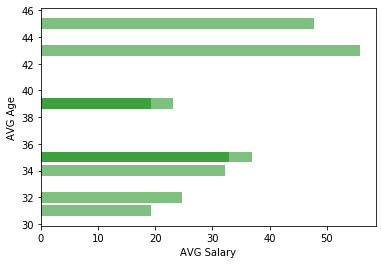

In [ ]:
#Барчарт зависимости зп на должности от среднего возраста сотрудников на ней.
import matplotlib.pyplot as plt

salary = [round(count_pos[x][1], 2) for x in range(len(count_pos))]
avg_age = [round(count_pos[x][3]) for x in range(len(count_pos))]
pos = [count_pos[x][0] for x in range(len(count_pos))]

plt.barh(avg_age, salary, alpha=0.5, color='green')
plt.xlabel('AVG Salary')
plt.ylabel('AVG Age')
#plt.yticks(avg_age,)

plt.show()

In [ ]:
#Посмотрим, какие позиции в компании являются наиболее затратными по выплатам заработной платы.

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT hr_dataset.position, SUM(salary_grid."Hourly Mid") AS sum_salary, 
 COUNT("Employee Name") AS count_emp FROM hr_dataset
 JOIN salary_grid ON hr_dataset.position = salary_grid."Position"
 GROUP BY hr_dataset.position ORDER BY sum_salary DESC;"""

cursor.execute(sql_str)
count_pos_salary = [a for a in cursor.fetchall()]

for i in range(len(count_pos_salary)):
    print(count_pos_salary[i][0], ' Затраты на ЗП:', round(count_pos_salary[i][1], 2), ' Кол-во сотрудников:', count_pos_salary[i][2])


Production Technician I  Затраты на ЗП: 2615.28  Кол-во сотрудников: 136
Production Technician II  Затраты на ЗП: 1315.56  Кол-во сотрудников: 57
Database Administrator  Затраты на ЗП: 426.92  Кол-во сотрудников: 13
Network Engineer  Затраты на ЗП: 289.26  Кол-во сотрудников: 9
Sr. Network Engineer  Затраты на ЗП: 239.1  Кол-во сотрудников: 5
Sr. DBA  Затраты на ЗП: 223.08  Кол-во сотрудников: 4
Accountant I  Затраты на ЗП: 74.16  Кол-во сотрудников: 3
Sr. Accountant  Затраты на ЗП: 74.02  Кол-во сотрудников: 2
Administrative Assistant  Затраты на ЗП: 57.69  Кол-во сотрудников: 3


Видим, что больше всего уходит денег на выплату зп сотрудникам на должностях Production Technician I и II.
Даже при низкой средней ставке, затраты большие, потому что этих сотрудников по кол-ву больше всего.

In [ ]:
#Рассмотрим таблицу с данными по ресурсам, с которых нанимаются сотрудники.
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT "Employment Source", "Total" FROM recruiting_costs ORDER BY "Total" DESC LIMIT 10;"""

cursor.execute(sql_str)
top_source = [a for a in cursor.fetchall()]

print('Топ-10 самых дорогих ресурсов по найму сотрудников.\n')
for i in range(len(top_source)):
    print(top_source[i][0])
    
sql_str1 = """SELECT hr_dataset.position, 
 string_agg(DISTINCT hr_dataset."Employee Source", ', ') AS source, 
 AVG(salary_grid."Hourly Mid") AS salary
 FROM hr_dataset
 JOIN salary_grid ON hr_dataset.position = salary_grid."Position"
 GROUP BY hr_dataset.position ORDER BY salary DESC LIMIT 3;"""

cursor.execute(sql_str1)
top_source_pos = [a for a in cursor.fetchall()]

print('\nРесурсы, откуда нанимаются самые дорогие сотрудники.\n')
for i in range(len(top_source_pos)):
    print('Должность:', top_source_pos[i][0], ' Ресурсы:', top_source_pos[i][1])


Топ-10 самых дорогих ресурсов по найму сотрудников.

MBTA ads
Diversity Job Fair
Newspager/Magazine
Careerbuilder
On-campus Recruiting
Website Banner Ads
Billboard
Monster.com
Social Networks - Facebook Twitter etc
Search Engine - Google Bing Yahoo

Ресурсы, откуда нанимаются самые дорогие сотрудники.

Должность: Sr. DBA  Ресурсы: Company Intranet - Partner, Vendor Referral
Должность: Sr. Network Engineer  Ресурсы: Employee Referral, On-campus Recruiting, Vendor Referral
Должность: Sr. Accountant  Ресурсы: Diversity Job Fair, Other


Самые высокооплачиваемые сотрудники как парвило нанимаются по направлениям, а не с ресурсов на которые уходят самые большие затраты.

In [ ]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT hr_dataset."Employee Source" AS source, 
 COUNT("Date of Termination") AS count_term
 FROM hr_dataset
 WHERE "Date of Termination" IS NOT NULL
 GROUP BY source ORDER BY count_term DESC LIMIT 5;"""

cursor.execute(sql_str)
top_source_term = [a for a in cursor.fetchall()]

print('Топ-5 ресурсов по найму среди уволенных сотрудников.\n')
for i in range(len(top_source_term)):
    print(top_source_term[i][0], 'уволенных:', top_source_term[i][1])
    
sql_str1 = """SELECT hr_dataset."Employee Source" AS source,
 AVG("Days Employed") AS avg_days
 FROM hr_dataset
 GROUP BY source ORDER BY avg_days DESC LIMIT 5;"""

cursor.execute(sql_str1)
top_source_days = [a for a in cursor.fetchall()]

print('\nТоп-5 ресурсов откуда работники трудятся дольше всего.\n')
for i in range(len(top_source_days)):
    print('Ресурс:', top_source_days[i][0], ' Средняя выработка:', round(top_source_days[i][1]))


Топ-5 ресурсов по найму среди уволенных сотрудников.

Diversity Job Fair уволенных: 16
Search Engine - Google Bing Yahoo уволенных: 15
Monster.com уволенных: 11
Social Networks - Facebook Twitter etc уволенных: 8
Word of Mouth уволенных: 7

Топ-5 ресурсов откуда работники трудятся дольше всего.

Ресурс: Careerbuilder  Средняя выработка: 2428
Ресурс: Other  Средняя выработка: 1910
Ресурс: Billboard  Средняя выработка: 1681
Ресурс: MBTA ads  Средняя выработка: 1580
Ресурс: Information Session  Средняя выработка: 1552


In [ ]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

sql_str = """SELECT recruiting_costs."Employment Source" AS source,
  recruiting_costs."Total" AS total, COUNT(hr_dataset.id) AS count_staff
  FROM recruiting_costs
  JOIN hr_dataset
  ON hr_dataset."Employee Source" = recruiting_costs."Employment Source"
  GROUP BY source, total
  ORDER BY total DESC LIMIT 15;"""

cursor.execute(sql_str)
count_staff_source = [a for a in cursor.fetchall()]

print('Количество нанятых сотрудников с самых затратных ресурсов по найму.\n')
for i in range(len(count_staff_source)):
    print('Ресурс:', count_staff_source[i][0], 'Затраты:', count_staff_source[i][1], 'Сотрудников нанято:', count_staff_source[i][2])


Количество нанятых сотрудников с самых затратных ресурсов по найму.

Ресурс: MBTA ads Затраты: 10980 Сотрудников нанято: 17
Ресурс: Diversity Job Fair Затраты: 10021 Сотрудников нанято: 29
Ресурс: Newspager/Magazine Затраты: 8291 Сотрудников нанято: 18
Ресурс: Careerbuilder Затраты: 7790 Сотрудников нанято: 1
Ресурс: On-campus Recruiting Затраты: 7500 Сотрудников нанято: 12
Ресурс: Website Banner Ads Затраты: 7143 Сотрудников нанято: 13
Ресурс: Billboard Затраты: 6192 Сотрудников нанято: 16
Ресурс: Monster.com Затраты: 5760 Сотрудников нанято: 24
Ресурс: Social Networks - Facebook Twitter etc Затраты: 5573 Сотрудников нанято: 11
Ресурс: Search Engine - Google Bing Yahoo Затраты: 5183 Сотрудников нанято: 25
Ресурс: Other Затраты: 3995 Сотрудников нанято: 9
Ресурс: Pay Per Click - Google Затраты: 3509 Сотрудников нанято: 21
Ресурс: Pay Per Click Затраты: 1323 Сотрудников нанято: 1
Ресурс: Professional Society Затраты: 1200 Сотрудников нанято: 20
Ресурс: Employee Referral Затраты: 0 Сотру

**Гипотеза 3.**

**Предположение, что наибольшее количество сотрудников было нанято с тех ресурсов, на которые потратились бОльшие деньги - не подтверждается. Больше всего было нанято людей по направлению (Employee Referral), где затраты нулевые. Однако не на много меньше людей было нанято и с другого ресурса Diversity Job Fair, где затраты  на найм одни из самых высоких.**

**В итоге по заявленным гипотезам полноценно не подтвердилась ни одна. Гипотеза 2 соответствует на одну часть и с небольшими уточнениями.**

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [ ]:
import re
import requests

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [ ]:
#проверка и настройка соединения с API VK
vk_token = '***'


url = 'https://api.vk.com/method/account.getProfileInfo?access_token=' + str(vk_token) + '&v=5.92'
response = getjson(url)

print(response)

{'response': {'first_name': 'Карина', 'last_name': 'Халтурина', 'bdate': '0.0.0', 'bdate_visibility': 1, 'city': {'id': 1, 'title': 'Москва'}, 'country': {'id': 1, 'title': 'Россия'}, 'home_town': '', 'maiden_name': '', 'phone': '+7 *** *** ** 54', 'relation': 0, 'screen_name': 'halturinak', 'sex': 1, 'status': ''}}


**Решено было взять для анализа 200 последних постов из паблика. Так как в среднем на сутки приходится 2 поста, полученные сроки должны покрывать период от начала года до нынешнего времени. Можно оценить время "спокойного" периода пользователей и их поведение во время наступления эпидемии и домашнего режима.**

In [ ]:
#получаем последние 100 постов из паблика Skillbox Вконтакте
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=100&v=5.92'
response1 = getjson(url)

print(response1)

{'response': {'count': 7673, 'items': [{'id': 58429, 'from_id': -66669811, 'owner_id': -66669811, 'date': 1588581277, 'marked_as_ads': 0, 'post_type': 'post', 'text': 'Да пребудут с вами скиллы! Сегодня праздник у всего фанатского мира «Звездных войн» — Star Wars Day. Культовая сага не только поражает воображение своим космическим сюжетом, но и заставляет задуматься: «А как это снимали?» В самом деле, как? Рассказываем о революционных решениях команды Джорджа Лукаса — от постройки громоздких макетов до CGI-технологий. Читайте в карточках!\n\n#В_закладки_Skillbox #Skillbox_дизайн', 'attachments': [{'type': 'photo', 'photo': {'id': 457498586, 'album_id': -7, 'owner_id': -66669811, 'user_id': 100, 'sizes': [{'type': 'm', 'url': 'https://sun1-21.userapi.com/c635103/v635103956/5abfe/_7EOZrvDI0k.jpg', 'width': 104, 'height': 130}, {'type': 'o', 'url': 'https://sun1-88.userapi.com/c635103/v635103956/5ac03/rgATYstIuD8.jpg', 'width': 130, 'height': 163}, {'type': 'p', 'url': 'https://sun1-95.us

In [ ]:
#создание списков с данными по датам потсов, кол-ву лайков, комментов, репостов, и названий рубрик постов, 1 часть
dates1 = [response1['response']['items'][i]['date'] for i in range(len(response1['response']['items']))]
likes1 = [response1['response']['items'][i]['likes']['count'] for i in range(len(response1['response']['items']))]
views1 = [response1['response']['items'][i]['views']['count'] for i in range(len(response1['response']['items']))]
reposts1 = [response1['response']['items'][i]['reposts']['count'] for i in range(len(response1['response']['items']))]
comments1 = [response1['response']['items'][i]['comments']['count'] for i in range(len(response1['response']['items']))]
rubrics1 = []

for i in range(len(response1['response']['items'])):
    sample_str = response1['response']['items'][i]['text']
    result = re.findall(r'#(\w+)', sample_str)
    rubrics1.append(result)


In [ ]:
#сдвигаем запрос и получаем следующие 100 постов из паблика Skillbox Вконтакте
url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=100&count=100&v=5.92'
response2 = getjson(url)

print(response2)

{'response': {'count': 7673, 'items': [{'id': 52296, 'from_id': -66669811, 'owner_id': -66669811, 'date': 1583511675, 'marked_as_ads': 0, 'post_type': 'post', 'text': 'Планируете создать собственную игру? А уверены в том, что не бросите свое детище на полпути? Советуем для начала прочитать нашу статью. Рассказываем, почему разработчики часто не доводят игры до завершения, каких ошибок следует избегать и с чего лучше начать свой путь в создании игр.\n\n#Статья_Skillbox #Skillbox_программирование', 'attachments': [{'type': 'link', 'link': {'url': 'https://skillbox.ru/media/code/kak_sozdat_pervuyu_igru_ne_brosiv_delo_na_polputi/?utm_source=skillbox.media&utm_medium=vk&utm_campaign=profession-gamedev&utm_content=articles&utm_term=firstgamedev', 'title': 'Как создать первую игру, не бросив дело на полпути', 'caption': 'skillbox.ru', 'description': 'Если кто и знает толк в том, как бросать проекты, то это я. И в этой статье я расскажу, как не повторить мои ошибки.', 'photo': {'id': 457294825

In [ ]:
#создание списков с данными по датам потсов, кол-ву лайков, комментов, репостов, и названий рубрик постов, 2 часть
dates2 = [response2['response']['items'][i]['date'] for i in range(len(response1['response']['items']))]
likes2 = [response2['response']['items'][i]['likes']['count'] for i in range(len(response1['response']['items']))]
views2 = [response2['response']['items'][i]['views']['count'] for i in range(len(response1['response']['items']))]
reposts2 = [response2['response']['items'][i]['reposts']['count'] for i in range(len(response1['response']['items']))]
comments2 = [response2['response']['items'][i]['comments']['count'] for i in range(len(response1['response']['items']))]
rubrics2 = []

for i in range(len(response2['response']['items'])):
    sample_str = response2['response']['items'][i]['text']
    result = re.findall(r'#(\w+)', sample_str)
    rubrics2.append(result)

In [ ]:
#конкатенация 2х частей списков с данными и форматирование даты в читаемый вид
from datetime import datetime, timedelta

dates = dates1 + dates2
likes = likes1 + likes2
views = views1 + views2
reposts = reposts1 + reposts2
comments = comments1 + comments2
rubrics = rubrics1 + rubrics2

dates = [(datetime.fromtimestamp(i) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S') for i in dates]

In [ ]:
#создание датафрейма с данными для более удобного отображения
d = {'date': dates, 'likes': likes, 'comments': comments, 'reposts': reposts, 'views': views, 'rubrics': rubrics}
vk_stat_df = pd.DataFrame(data=d)

vk_stat_df.head()

,date,likes,comments,reposts,views,rubrics
0,2020-05-04 11:34:37,42,0,2,5884,"[В_закладки_Skillbox, Skillbox_дизайн]"
1,2020-05-03 15:38:01,77,0,6,18185,"[В_закладки_Skillbox, Skillbox_дизайн]"
2,2020-05-02 16:05:33,142,7,25,23583,"[Совет_препода_Skillbox, Skillbox_дизайн]"
3,2020-05-01 13:58:50,103,10,3,21188,"[В_закладки_Skillbox, Skillbox_дизайн]"
4,2020-04-30 17:39:27,45,7,3,14973,"[Студенты_Skillbox, Skillbox_программирование]"


In [ ]:
#так как за май выложенио только 4 поста (первые четыре строчки) уберем их из таблицы, чтобы не включать в статистику
vk_stat_df = vk_stat_df[4:]
vk_stat_df.head()

,date,likes,comments,reposts,views,rubrics
4,2020-04-30 17:39:27,45,7,3,14973,"[Студенты_Skillbox, Skillbox_программирование]"
5,2020-04-29 12:59:28,96,5,13,20860,[Шрифты_Skillbox]
6,2020-04-28 17:55:29,71,0,0,18611,"[Айдентика_Skillbox, Skillbox_дизайн]"
7,2020-04-27 14:31:08,40,5,3,17526,[Расписание_Skillbox]
8,2020-04-27 12:27:03,78,7,4,22390,"[Skillbox_дизайн, В_закладки_Skillbox]"


In [ ]:
#последний выгруженный пост датируется 16 января, то есть в статистику войдут посты за 3,5 месяца
vk_stat_df.tail()

,date,likes,comments,reposts,views,rubrics
195,2020-01-18 12:08:39,208,7,37,23204,"[В_закладки_Skillbox, Skillbox_управление]"
196,2020-01-17 19:15:34,52,0,8,15039,"[Статья_Skillbox, Skillbox_управление]"
197,2020-01-17 15:31:57,26,0,1,15823,"[Skillbox_программирование, Skillbox_игра]"
198,2020-01-17 11:00:03,68,15,1,20556,"[Skillbox_маркетинг, Кейс_Skillbox]"
199,2020-01-16 18:01:34,37,0,2,13364,"[Статья_Skillbox, Skillbox_дизайн]"


In [ ]:
vk_stat_df['date'] = pd.to_datetime(vk_stat_df['date'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
#создание столбца со значением вовлеченности постов(сумма лайков, комментариев и репостов)
vk_stat_df['involvement'] = vk_stat_df['likes'] + vk_stat_df['comments'] + vk_stat_df['reposts']
vk_stat_df.head()

,date,likes,comments,reposts,views,rubrics,involvement
4,2020-04-30 17:39:27,45,7,3,14973,"[Студенты_Skillbox, Skillbox_программирование]",55
5,2020-04-29 12:59:28,96,5,13,20860,[Шрифты_Skillbox],114
6,2020-04-28 17:55:29,71,0,0,18611,"[Айдентика_Skillbox, Skillbox_дизайн]",71
7,2020-04-27 14:31:08,40,5,3,17526,[Расписание_Skillbox],48
8,2020-04-27 12:27:03,78,7,4,22390,"[Skillbox_дизайн, В_закладки_Skillbox]",89


In [ ]:
#группировка и подсчет средних значений вовлеченности постов и просмотров по месяцам и по часам в течение дня

mean_involve_month = vk_stat_df.groupby(vk_stat_df['date'].dt.month)['involvement'].mean()
mean_involve_hour = vk_stat_df.groupby(vk_stat_df['date'].dt.hour)['involvement'].mean()

mean_views_month = vk_stat_df.groupby(vk_stat_df['date'].dt.month)['views'].mean()
mean_views_hour = vk_stat_df.groupby(vk_stat_df['date'].dt.hour)['views'].mean()


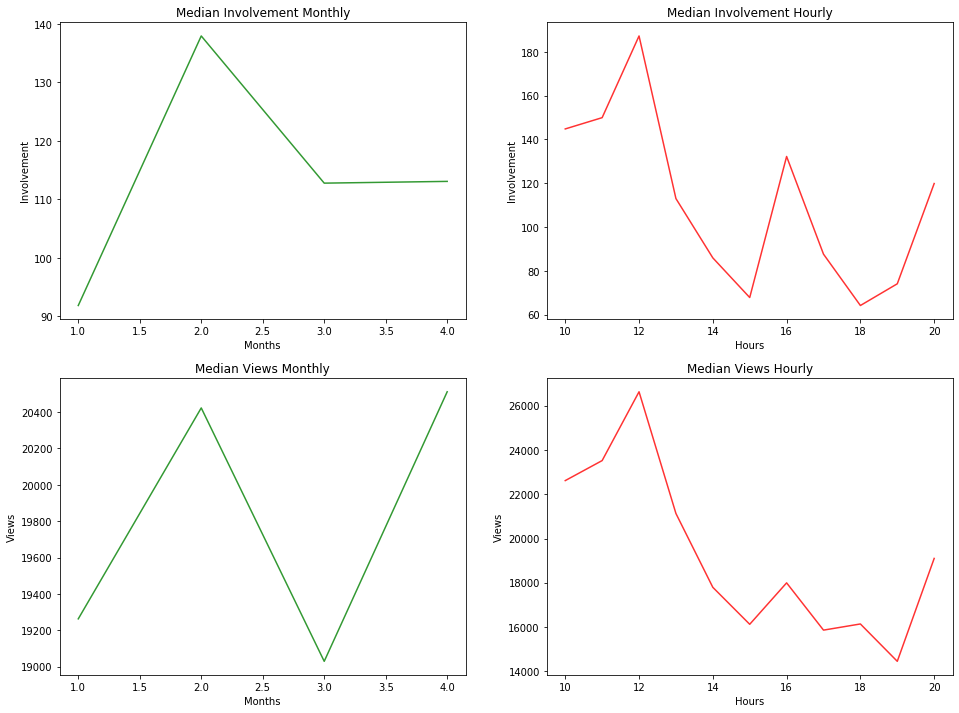

In [ ]:
#визуализация изменения среднего значения просмотров постов и вовлеченности по месяцам и по часам в течение дня
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize = (16,12))

x = mean_involve_month.index
y = mean_involve_month.values
axs[0,0].plot(x, y, alpha = 0.8, color='green')
axs[0,0].set_title('Median Involvement Monthly')
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('Involvement')

x = mean_involve_hour.index
y = mean_involve_hour.values
axs[0,1].plot(x, y, alpha = 0.8, color='red')
axs[0,1].set_title('Median Involvement Hourly')
axs[0,1].set_xlabel('Hours')
axs[0,1].set_ylabel('Involvement')

x = mean_views_month.index
y = mean_views_month.values
axs[1,0].plot(x, y, alpha = 0.8, color='green')
axs[1,0].set_title('Median Views Monthly')
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('Views')

x = mean_views_hour.index
y = mean_views_hour.values
axs[1,1].plot(x, y, alpha = 0.8, color='red')
axs[1,1].set_title('Median Views Hourly')
axs[1,1].set_xlabel('Hours')
axs[1,1].set_ylabel('Views')

plt.show()

**Анализируя графики можно видеть, что среднее значение вовлеченности у постов максимально в феврале. В марте и апреле оно снижается на половину. А вот среднее кол-во просмотров постов очень падает в марте, а в апреле снова увеличивается. То есть во время домашнего режима люди меньше производят действий с постами, однако просматривать соцсети в целом стали больше.
В течение дня наибольшая вовлеченность отмечается у постов выложенных в районе 12 часов дня, дальше небольшой пик на 16-17 часах и еще один повыше в 20 часов. По просмотрам постов ситуация схожая.**

In [ ]:
#создание списка со всеми рубриками, которые указаны в постах по хештегам
rubrics_name = set(vk_stat_df['rubrics'].sum())

rubrics_count = []

for name in rubrics_name:
    rubrics_count.append(vk_stat_df[vk_stat_df['rubrics'].str.contains(name, regex=False) == True]['date'].count())


In [ ]:
#создание таблицы с топ-10 рубрик по кол-ву постов на данные темы за анализируемый период
rubrics_stat_df = pd.DataFrame(data={'name': list(rubrics_name), 'count_post': rubrics_count})
rubrics_stat_df = rubrics_stat_df.sort_values(by = 'count_post', ascending = False, ignore_index = True)
rubrics_stat_df = rubrics_stat_df[:10]

rubrics_stat_df

,name,count_post
0,Skillbox_дизайн,43
1,Статья_Skillbox,43
2,В_закладки_Skillbox,30
3,Skillbox_программирование,30
4,Skillbox_маркетинг,27
5,Skillbox_управление,16
6,Расписание_Skillbox,15
7,Skillbox_вдохновляет,9
8,Лекторий_Skillbox,9
9,Марафон_Skillbox,6


In [ ]:
#добавление столбцов со средними значениями вовлеченности и просмотров постов по топ-рубрикам

top_name_rubrics = rubrics_stat_df['name'].to_list()

top_rubrics_involv = []
top_rubrics_views = []

for name in top_name_rubrics:
    top_rubrics_involv.append(vk_stat_df[vk_stat_df['rubrics'].str.contains(name, regex=False) == True]['involvement'].mean())
    
    top_rubrics_views.append(vk_stat_df[vk_stat_df['rubrics'].str.contains(name, regex=False) == True]['views'].mean())
    
rubrics_stat_df['mean_involv'] = top_rubrics_involv
rubrics_stat_df['mean_involv'] = round(rubrics_stat_df['mean_involv'])
rubrics_stat_df['mean_views'] = top_rubrics_views
rubrics_stat_df['mean_views'] = round(rubrics_stat_df['mean_views'])

rubrics_stat_df

,name,count_post,mean_involv,mean_views
0,Skillbox_дизайн,43,160.0,22274.0
1,Статья_Skillbox,43,70.0,14533.0
2,В_закладки_Skillbox,30,231.0,30480.0
3,Skillbox_программирование,30,108.0,20386.0
4,Skillbox_маркетинг,27,162.0,23540.0
5,Skillbox_управление,16,100.0,17900.0
6,Расписание_Skillbox,15,74.0,16004.0
7,Skillbox_вдохновляет,9,121.0,20873.0
8,Лекторий_Skillbox,9,37.0,13679.0
9,Марафон_Skillbox,6,66.0,16464.0


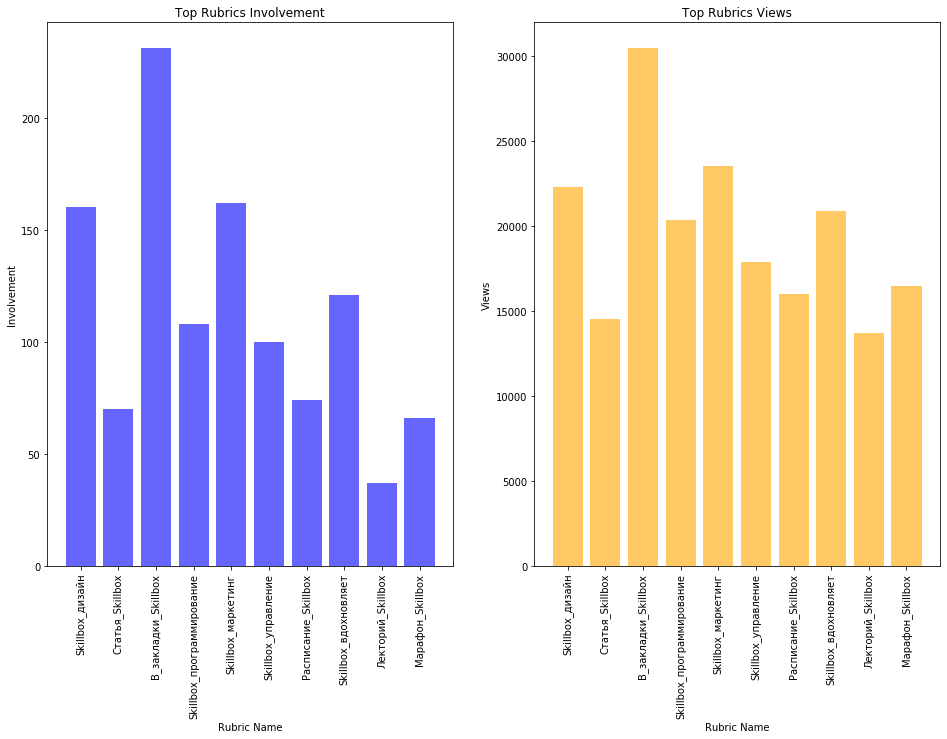

In [ ]:
#визуализация данных из полученной таблицы

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,10))

x = rubrics_stat_df['name']
y = rubrics_stat_df['mean_involv']
ax1.bar(x, y, alpha = 0.6, color='blue')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.set_title('Top Rubrics Involvement')
ax1.set_xlabel('Rubric Name')
ax1.set_ylabel('Involvement')

x = rubrics_stat_df['name']
y = rubrics_stat_df['mean_views']
ax2.bar(x, y, alpha = 0.6, color='orange')
ax2.tick_params(axis='x', labelrotation = 90)
ax2.set_title('Top Rubrics Views')
ax2.set_xlabel('Rubric Name')
ax2.set_ylabel('Views')

plt.show()

**По барчартам видно, что наибольшей вовлеченностью характеризуются посты в темах "В закладки", "Дизайн" и "Маркетинг", так же людям интересна рубрика "Skillbox вдохновляет". Посты о в темах программирования или управления вовлекают пользователя меньше. Самые невовлекаемые рубрики - Статья и Лекторий.**

**Если соотносить со средним кол-вом просмотров постов по выбранным рубрикам, то тема "В закладки" все так же лидирует. Дизайн и маркетинг и "Skillbox вдохновляет" так же имеют высокие показатели по сравнению с другими темами. Однако относительный разброс по этому показателю между популярными рубриками и менее популярными не такой большой, если сравнивать с разбросом по вовлеченности. Можно предположить, что люди, интересующиеся другими темами, просматривают посты не сильно меньше, просто производят гораздо меньше действий(лайк, коммент, репост) в соцсетях принципе.**

**Рекомендации.**

**По времени в течение дня лучше всего делать посты в 12-13 часов и 20 часов. Период, когда люди чаще заглядывают в соцсети.** 

**Для поднятия общего показателя вовлеченности в паблике можно делать больше постов по рубрикам "Skillbox вдохновляет", показатель средней вовлеченности неплохой, а в статистике таких постов всего 9 за 3,5 месяца. 
Так же можно гораздо реже делать посты со статьями, люди не очень активно с ними взаимодействуют, а контента такого в паблике много. Или же поменять концепцию рубрики, чтобы она стала интереснее пользователям. Так же и с рубрикой "Лекторий".**